# Basics

1. A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

2. A decision tree is a flowchart-like tree structure where an internal node represents feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the `root node`. It learns to partition based on the attribute value.

#### Strengths and Weakness of Decision Tree approach

**The strengths of decision tree methods are:**

- Decision trees are able to generate understandable rules.
- Decision trees perform classification without requiring much computation.
- Decision trees are able to handle both continuous and categorical variables.
- Decision trees provide a clear indication of which fields are most important for prediction or classification.

**The weaknesses of decision tree methods:**

- Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.
- Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.
- Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

### define a pandas dataframe

In [2]:
df = pd.DataFrame()

##### Let's add some data

In [3]:
df["Age"] = [25, 35, 40, 14, 31]
df["isFat"] = [False, True, False, False, True]
df["eatPizza"] = [False, True, False, False, True]
df["walk (km)"] = [7.5, 0.9, 4, 8, 2.3]
df

,Age,isFat,eatPizza,walk (km)
0,25,False,False,7.5
1,35,True,True,0.9
2,40,False,False,4.0
3,14,False,False,8.0
4,31,True,True,2.3


**N.B.** To predict anything, we need 2 types of data.
1. Feature data
2. Target data

We'll predict target data based on feature data.

So, let's split the data into feature and target

**$y = mx + c$**

### feature

In [4]:
X = df.drop("isFat", axis=1)
X

,Age,eatPizza,walk (km)
0,25,False,7.5
1,35,True,0.9
2,40,False,4.0
3,14,False,8.0
4,31,True,2.3


### target

In [5]:
y = df["isFat"]
y

0    False
1     True
2    False
3    False
4     True
Name: isFat, dtype: bool

### divide train and test

In [6]:
X_train, X_test = X[:3], X[3:]
X_train

,Age,eatPizza,walk (km)
0,25,False,7.5
1,35,True,0.9
2,40,False,4.0


In [7]:
y_train, y_test = y[:3], y[3:]
y_train

0    False
1     True
2    False
Name: isFat, dtype: bool

### define the model

In [8]:
myStudent = DecisionTreeClassifier()

### train the model

In [9]:
myStudent.fit(X_train, y_train)

DecisionTreeClassifier()

### take exam of the model

In [10]:
myStudent.predict(X_test)

array([False,  True])

In [11]:
y_test

3    False
4     True
Name: isFat, dtype: bool

### what mark the model got in the text exam?

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

**obseravtion:** the model expects `float` value for doing relevant calculation. So convert it before providing it to the model

In [14]:
y_pred = myStudent.predict(X_test)

mean_squared_error(y_test.astype(np.float32), y_pred.astype(np.float32))

0.0

In [15]:
r2_score(y_test.astype(np.float32), y_pred.astype(np.float32))

1.0

### visualize

In [16]:
from sklearn import tree

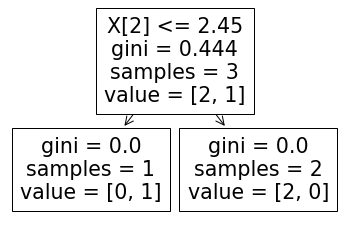

In [18]:
tree.plot_tree(myStudent);

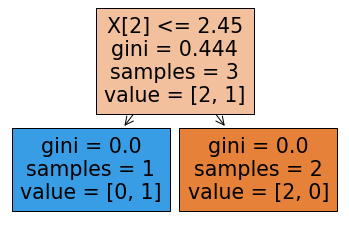

In [22]:
tree.plot_tree(myStudent, filled=True);

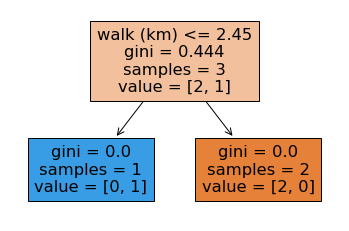

In [27]:
tree.plot_tree(myStudent,
               feature_names = ["Age", "eatPizza", "walk (km)"],
               filled = True);

In [25]:
print(tree.export_text(myStudent))

|--- feature_2 <= 2.45
|   |--- class: True
|--- feature_2 >  2.45
|   |--- class: False



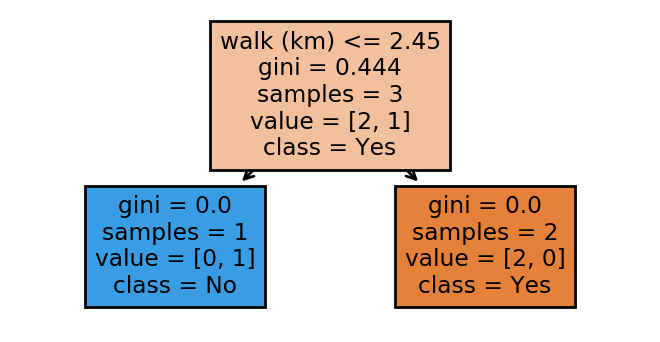

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=200)

tree.plot_tree(myStudent,
               feature_names = ["Age", "eatPizza", "walk (km)"], 
               class_names=["Yes", "No"],
               filled = True)

fig.savefig('imagename.png')

### Let's see another `criterion=entropy`

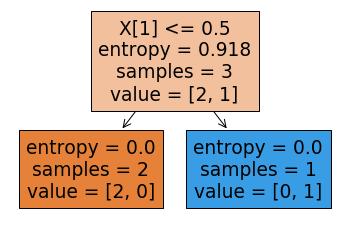

In [28]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train,y_train)
tree.plot_tree(clf, filled=True);

In [29]:
print(tree.export_text(clf))

|--- feature_1 <= 0.50
|   |--- class: False
|--- feature_1 >  0.50
|   |--- class: True



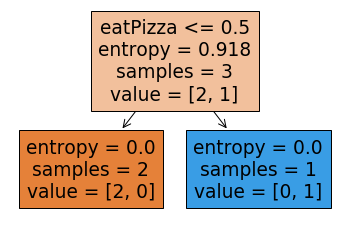

In [30]:
tree.plot_tree(clf,
               feature_names = ["Age", "eatPizza", "walk (km)"],
               filled = True);